In [2]:
# Imports
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import dummy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Fichier source
data = pd.read_csv('winequality-red.csv', sep=";")

X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

In [4]:
# Séparation training/testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# Scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [5]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), msq_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), msq_dum, color='green', label='dum')
plt.scatter(range(2,taille+1), msq_random, color='blue', label='random')

plt.legend()
plt.grid('on')

NameError: name 'taille' is not defined

In [6]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), r2_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), r2_dum, color='green', label='dum')
plt.scatter(range(2,taille+1), r2_random, color='blue', label='random')

plt.legend()
plt.grid('on')

NameError: name 'taille' is not defined

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 21}
Résultats de la validation croisée :
	{'neg_mean_squared_error'} = -0.614 (+/-0.077) for 'mean_fit_time'
	{'neg_mean_squared_error'} = -0.576 (+/-0.112) for 'std_fit_time'
	{'neg_mean_squared_error'} = -0.594 (+/-0.133) for 'mean_score_time'
	{'neg_mean_squared_error'} = -0.559 (+/-0.053) for 'std_score_time'
	{'neg_mean_squared_error'} = -0.552 (+/-0.083) for 'param_n_neighbors'
	{'neg_mean_squared_error'} = -0.563 (+/-0.054) for 'params'
	{'neg_mean_squared_error'} = -0.568 (+/-0.073) for 'split0_test_neg_mean_squared_error'
	{'neg_mean_squared_error'} = -0.567 (+/-0.078) for 'split1_test_neg_mean_squared_error'
	{'neg_mean_squared_error'} = -0.548 (+/-0.076) for 'split2_test_neg_mean_squared_error'
	{'neg_mean_squared_error'} = -0.556 (+/-0.070) for 'split3_test_neg_mean_squared_error'
	{'neg_mean_squared_error'} = -0.554 (+/-0.080) for 'split4_test_neg_mean_squared_error'
	{'neg_mean_squared_error'} = -0.5

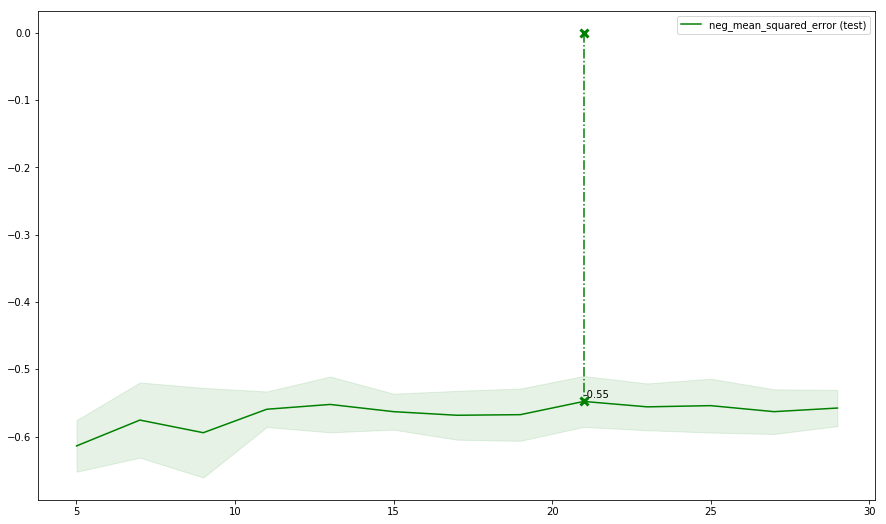

In [9]:
bande_passante = range(5,30,2)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':bande_passante}

# Choisir un score à optimiser
#score = {'neg_mean_squared_error'}
score = {'neg_mean_squared_error'}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
# un classifieur kNN
# hyperparamètres à tester
# nombre de folds de validation croisée
# score à optimiser
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),param_grid, cv=5, scoring=score, refit='neg_mean_squared_error', return_train_score=False)

# Optimiser ce classifieur sur le jeu d'entraînement
# clf.fit(X_train, y_train)
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:", clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
results = clf.cv_results_

# Get the regular numpy array from the MaskedArray
#X_axis = np.array(results['param_min_samples_split'].data, dtype=float)
X_axis = bande_passante

# score moyen
# écart-type du score
# valeur de l'hyperparamètre
for scorer, color in zip(sorted(score), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        
        if sample != 'train':
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]

            #print('mean_%s_%s' % (sample, scorer))
            #print(sample_score_mean)
            #print('std_%s_%s' % (sample, scorer))
            #print(sample_score_std)

            plt.figure(1, figsize=(15, 9))
            plt.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std, alpha=0.1 if sample == 'test' else 0, color=color)

            plt.plot(X_axis, sample_score_mean, style, color=color, alpha=1 if sample == 'test' else 0.7, label="%s (%s)" % (scorer, sample))

            best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
            best_score = results['mean_test_%s' % scorer][best_index]

            # Plot a dotted vertical line at the best score for that scorer marked by x
            plt.plot([X_axis[best_index], ] * 2, [0, best_score], linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

            # Annotate the best score for that scorer
            plt.annotate("%0.2f" % best_score,(X_axis[best_index], best_score + 0.005))

            # Légendes
            plt.legend()
        
for mean, std, params in zip(sample_score_mean, sample_score_std,  results):
         print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, mean, std * 2, params))

In [7]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_neg_mean_squared_error', 'split1_test_neg_mean_squared_error', 'split2_test_neg_mean_squared_error', 'split3_test_neg_mean_squared_error', 'split4_test_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error'])